In [35]:
!pip install -q -U tensorflow>=1.8.0
!pip install tabulate
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import time
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


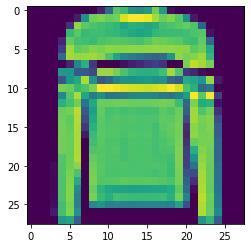

In [36]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization

In [37]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets

In [38]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Architecture Comparision

### Different combination of number of filters

Model 1 [(32,2),(16,2), (0.3,0.3)] - Half number of filters in each layers

In [39]:
model_01 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_01.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_01.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_01.add(tf.keras.layers.Dropout(0.3))

model_01.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model_01.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_01.add(tf.keras.layers.Dropout(0.3))

model_01.add(tf.keras.layers.Flatten())
model_01.add(tf.keras.layers.Dense(256, activation='relu'))
model_01.add(tf.keras.layers.Dropout(0.5))
model_01.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 2 [(64,2),(128,2), (0.3,0.3)] - Double number of filters in each layers

In [40]:
model_02 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_02.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_02.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_02.add(tf.keras.layers.Dropout(0.3))

model_02.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model_02.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_02.add(tf.keras.layers.Dropout(0.3))

model_02.add(tf.keras.layers.Flatten())
model_02.add(tf.keras.layers.Dense(256, activation='relu'))
model_02.add(tf.keras.layers.Dropout(0.5))
model_02.add(tf.keras.layers.Dense(10, activation='softmax'))

### Different combinations of kernels

Model 3 [(64,4),(32,4), (0.3,0.3)] - Bigger kernel size

In [41]:
model_03 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_03.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding='same', activation='relu', input_shape=(28,28,1))) 
model_03.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model_03.add(tf.keras.layers.Dropout(0.3))

model_03.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_03.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model_03.add(tf.keras.layers.Dropout(0.3))

model_03.add(tf.keras.layers.Flatten())
model_03.add(tf.keras.layers.Dense(256, activation='relu'))
model_03.add(tf.keras.layers.Dropout(0.5))
model_03.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 4 [(64,3),(32,6), (0.3,0.3)] - Different kernel sizes

In [42]:
model_04 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_04.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model_04.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_04.add(tf.keras.layers.Dropout(0.3))

model_04.add(tf.keras.layers.Conv2D(filters=32, kernel_size=6, padding='same', activation='relu'))
model_04.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model_04.add(tf.keras.layers.Dropout(0.3))

model_04.add(tf.keras.layers.Flatten())
model_04.add(tf.keras.layers.Dense(256, activation='relu'))
model_04.add(tf.keras.layers.Dropout(0.5))
model_04.add(tf.keras.layers.Dense(10, activation='softmax'))

### Different dropout probability

Model 5 [(64,2),(32,2), (0.2,0.2)] - Smaller dropout probability

In [43]:
model_05 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_05.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_05.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_05.add(tf.keras.layers.Dropout(0.2))

model_05.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_05.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model_05.add(tf.keras.layers.Dropout(0.2))

model_05.add(tf.keras.layers.Flatten())
model_05.add(tf.keras.layers.Dense(256, activation='relu'))
model_05.add(tf.keras.layers.Dropout(0.5))
model_05.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 6 [(64,2),(32,2), (0.4,0.4)] - Bigger dropout probability

In [44]:
model_06 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_06.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_06.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_06.add(tf.keras.layers.Dropout(0.4))

model_06.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_06.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_06.add(tf.keras.layers.Dropout(0.4))

model_06.add(tf.keras.layers.Flatten())
model_06.add(tf.keras.layers.Dense(256, activation='relu'))
model_06.add(tf.keras.layers.Dropout(0.5))
model_06.add(tf.keras.layers.Dense(10, activation='softmax'))

### Architecture with more layers

Model 7 [(64,2),(32,2), (16,2),(0.3,0.3,0.2)] - Add one more layer

In [45]:
model_07 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_07.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_07.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_07.add(tf.keras.layers.Dropout(0.3))

model_07.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_07.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_07.add(tf.keras.layers.Dropout(0.3))

model_07.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model_07.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_07.add(tf.keras.layers.Dropout(0.2))

model_07.add(tf.keras.layers.Flatten())
model_07.add(tf.keras.layers.Dense(256, activation='relu'))
model_07.add(tf.keras.layers.Dropout(0.6))
model_07.add(tf.keras.layers.Dense(10, activation='softmax'))

### Architectures combined changes

Model 8 [(32,2),(16,2),(16,2), (0.3,0.3,0.3)] - Half number of filters and one addition layer

In [46]:
model_08 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_08.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_08.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_08.add(tf.keras.layers.Dropout(0.3))

model_08.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model_08.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_08.add(tf.keras.layers.Dropout(0.3))

model_08.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model_08.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_08.add(tf.keras.layers.Dropout(0.3))

model_08.add(tf.keras.layers.Flatten())
model_08.add(tf.keras.layers.Dense(256, activation='relu'))
model_08.add(tf.keras.layers.Dropout(0.5))
model_08.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 9 [(128,2),(64,2), (0.2,0.2)] - Double number of filters and reduced dropout percentage

In [47]:
model_09 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_09.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_09.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_09.add(tf.keras.layers.Dropout(0.2))

model_09.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model_09.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_09.add(tf.keras.layers.Dropout(0.2))

model_09.add(tf.keras.layers.Flatten())
model_09.add(tf.keras.layers.Dense(256, activation='relu'))
model_09.add(tf.keras.layers.Dropout(0.5))
model_09.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 10 [(32,4),(16,4), (0.3,0.3)] - Half number of filters and double the size of kernels

In [48]:
model_10 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_10.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(28,28,1)))
model_10.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_10.add(tf.keras.layers.Dropout(0.3))

model_10.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, padding='same', activation='relu'))
model_10.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_10.add(tf.keras.layers.Dropout(0.3))

model_10.add(tf.keras.layers.Flatten())
model_10.add(tf.keras.layers.Dense(256, activation='relu'))
model_10.add(tf.keras.layers.Dropout(0.5))
model_10.add(tf.keras.layers.Dense(10, activation='softmax'))

## Compile the models

In [49]:
model_01.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_01 = ModelCheckpoint(filepath='model_01.weights.best.hdf5', verbose = 1, save_best_only=True)

In [50]:
model_02.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_02 = ModelCheckpoint(filepath='model_02.weights.best.hdf5', verbose = 1, save_best_only=True)

In [51]:
model_03.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_03 = ModelCheckpoint(filepath='model_03.weights.best.hdf5', verbose = 1, save_best_only=True)

In [52]:
model_04.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_04 = ModelCheckpoint(filepath='model_04.weights.best.hdf5', verbose = 1, save_best_only=True)

In [53]:
model_05.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_05 = ModelCheckpoint(filepath='model_05.weights.best.hdf5', verbose = 1, save_best_only=True)

In [54]:
model_06.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_06 = ModelCheckpoint(filepath='model_06.weights.best.hdf5', verbose = 1, save_best_only=True)

In [55]:
model_07.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_07 = ModelCheckpoint(filepath='model_07.weights.best.hdf5', verbose = 1, save_best_only=True)

In [56]:
model_08.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_08 = ModelCheckpoint(filepath='model_08.weights.best.hdf5', verbose = 1, save_best_only=True)

In [57]:
model_09.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_09 = ModelCheckpoint(filepath='model_09.weights.best.hdf5', verbose = 1, save_best_only=True)

In [58]:
model_10.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
checkpointer_10 = ModelCheckpoint(filepath='model_10.weights.best.hdf5', verbose = 1, save_best_only=True)

## Train the models

Set batch size to be 128 and train for 10 epochs

In [59]:
BATCHSIZE = 128
EPOCH = 10

In [60]:
# Mark start time
start = time.time()
model_01.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_01])
# Calculate training time
time_01 = time.time() - start

Epoch 1/10
430/430 [==============================] - ETA: 0s - loss: 0.7563 - accuracy: 0.7173
Epoch 1: val_loss improved from inf to 0.45427, saving model to model_01.weights.best.hdf5
430/430 [==============================] - 9s 19ms/step - loss: 0.7563 - accuracy: 0.7173 - val_loss: 0.4543 - val_accuracy: 0.8402
Epoch 2/10
428/430 [============================>.] - ETA: 0s - loss: 0.4966 - accuracy: 0.8154
Epoch 2: val_loss improved from 0.45427 to 0.38172, saving model to model_01.weights.best.hdf5
430/430 [==============================] - 8s 18ms/step - loss: 0.4964 - accuracy: 0.8154 - val_loss: 0.3817 - val_accuracy: 0.8658
Epoch 3/10
428/430 [============================>.] - ETA: 0s - loss: 0.4402 - accuracy: 0.8384
Epoch 3: val_loss improved from 0.38172 to 0.35788, saving model to model_01.weights.best.hdf5
430/430 [==============================] - 8s 18ms/step - loss: 0.4404 - accuracy: 0.8384 - val_loss: 0.3579 - val_accuracy: 0.8704
Epoch 4/10
430/430 [===============

In [61]:
# Mark start time
start = time.time()
model_02.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_02])
# Calculate training time
time_02 = time.time() - start

Epoch 1/10
429/430 [============================>.] - ETA: 0s - loss: 0.5829 - accuracy: 0.7855
Epoch 1: val_loss improved from inf to 0.36570, saving model to model_02.weights.best.hdf5
430/430 [==============================] - 15s 34ms/step - loss: 0.5826 - accuracy: 0.7856 - val_loss: 0.3657 - val_accuracy: 0.8686
Epoch 2/10
429/430 [============================>.] - ETA: 0s - loss: 0.3872 - accuracy: 0.8600
Epoch 2: val_loss improved from 0.36570 to 0.30944, saving model to model_02.weights.best.hdf5
430/430 [==============================] - 14s 33ms/step - loss: 0.3872 - accuracy: 0.8600 - val_loss: 0.3094 - val_accuracy: 0.8896
Epoch 3/10
430/430 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.8764
Epoch 3: val_loss improved from 0.30944 to 0.27597, saving model to model_02.weights.best.hdf5
430/430 [==============================] - 14s 33ms/step - loss: 0.3388 - accuracy: 0.8764 - val_loss: 0.2760 - val_accuracy: 0.9006
Epoch 4/10
429/430 [============

In [62]:
# Mark start time
start = time.time()
model_03.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_03])
# Calculate training time
time_03 = time.time() - start

Epoch 1/10
430/430 [==============================] - ETA: 0s - loss: 1.0231 - accuracy: 0.6124
Epoch 1: val_loss improved from inf to 0.53888, saving model to model_03.weights.best.hdf5
430/430 [==============================] - 9s 20ms/step - loss: 1.0231 - accuracy: 0.6124 - val_loss: 0.5389 - val_accuracy: 0.8022
Epoch 2/10
430/430 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.7600
Epoch 2: val_loss improved from 0.53888 to 0.45162, saving model to model_03.weights.best.hdf5
430/430 [==============================] - 8s 20ms/step - loss: 0.6454 - accuracy: 0.7600 - val_loss: 0.4516 - val_accuracy: 0.8356
Epoch 3/10
430/430 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7904
Epoch 3: val_loss improved from 0.45162 to 0.40809, saving model to model_03.weights.best.hdf5
430/430 [==============================] - 8s 20ms/step - loss: 0.5694 - accuracy: 0.7904 - val_loss: 0.4081 - val_accuracy: 0.8514
Epoch 4/10
430/430 [===============

In [63]:
# Mark start time
start = time.time()
model_04.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_04])
# Calculate training time
time_04 = time.time() - start

Epoch 1/10
429/430 [============================>.] - ETA: 0s - loss: 0.7307 - accuracy: 0.7331
Epoch 1: val_loss improved from inf to 0.39578, saving model to model_04.weights.best.hdf5
430/430 [==============================] - 14s 31ms/step - loss: 0.7304 - accuracy: 0.7331 - val_loss: 0.3958 - val_accuracy: 0.8572
Epoch 2/10
429/430 [============================>.] - ETA: 0s - loss: 0.4420 - accuracy: 0.8404
Epoch 2: val_loss improved from 0.39578 to 0.33194, saving model to model_04.weights.best.hdf5
430/430 [==============================] - 13s 30ms/step - loss: 0.4419 - accuracy: 0.8405 - val_loss: 0.3319 - val_accuracy: 0.8838
Epoch 3/10
429/430 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8612
Epoch 3: val_loss improved from 0.33194 to 0.29388, saving model to model_04.weights.best.hdf5
430/430 [==============================] - 13s 30ms/step - loss: 0.3819 - accuracy: 0.8613 - val_loss: 0.2939 - val_accuracy: 0.8902
Epoch 4/10
429/430 [============

In [64]:
# Mark start time
start = time.time()
model_05.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_05])
# Calculate training time
time_05 = time.time() - start

Epoch 1/10
430/430 [==============================] - ETA: 0s - loss: 0.7798 - accuracy: 0.7150
Epoch 1: val_loss improved from inf to 0.44906, saving model to model_05.weights.best.hdf5
430/430 [==============================] - 12s 26ms/step - loss: 0.7798 - accuracy: 0.7150 - val_loss: 0.4491 - val_accuracy: 0.8434
Epoch 2/10
430/430 [==============================] - ETA: 0s - loss: 0.4956 - accuracy: 0.8167
Epoch 2: val_loss improved from 0.44906 to 0.38239, saving model to model_05.weights.best.hdf5
430/430 [==============================] - 10s 24ms/step - loss: 0.4956 - accuracy: 0.8167 - val_loss: 0.3824 - val_accuracy: 0.8630
Epoch 3/10
428/430 [============================>.] - ETA: 0s - loss: 0.4394 - accuracy: 0.8382
Epoch 3: val_loss improved from 0.38239 to 0.34596, saving model to model_05.weights.best.hdf5
430/430 [==============================] - 10s 24ms/step - loss: 0.4397 - accuracy: 0.8381 - val_loss: 0.3460 - val_accuracy: 0.8728
Epoch 4/10
430/430 [============

In [65]:
# Mark start time
start = time.time()
model_06.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_06])
# Calculate training time
time_06 = time.time() - start

Epoch 1/10
430/430 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.7490
Epoch 1: val_loss improved from inf to 0.41189, saving model to model_06.weights.best.hdf5
430/430 [==============================] - 11s 24ms/step - loss: 0.6807 - accuracy: 0.7490 - val_loss: 0.4119 - val_accuracy: 0.8564
Epoch 2/10
429/430 [============================>.] - ETA: 0s - loss: 0.4616 - accuracy: 0.8315
Epoch 2: val_loss improved from 0.41189 to 0.36206, saving model to model_06.weights.best.hdf5
430/430 [==============================] - 10s 24ms/step - loss: 0.4615 - accuracy: 0.8316 - val_loss: 0.3621 - val_accuracy: 0.8686
Epoch 3/10
428/430 [============================>.] - ETA: 0s - loss: 0.4121 - accuracy: 0.8479
Epoch 3: val_loss improved from 0.36206 to 0.31958, saving model to model_06.weights.best.hdf5
430/430 [==============================] - 10s 24ms/step - loss: 0.4122 - accuracy: 0.8479 - val_loss: 0.3196 - val_accuracy: 0.8890
Epoch 4/10
428/430 [============

In [66]:
# Mark start time
start = time.time()
model_07.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_07])
# Calculate training time
time_07 = time.time() - start

Epoch 1/10
429/430 [============================>.] - ETA: 0s - loss: 1.0520 - accuracy: 0.6031
Epoch 1: val_loss improved from inf to 0.56412, saving model to model_07.weights.best.hdf5
430/430 [==============================] - 12s 26ms/step - loss: 1.0515 - accuracy: 0.6033 - val_loss: 0.5641 - val_accuracy: 0.7864
Epoch 2/10
428/430 [============================>.] - ETA: 0s - loss: 0.6549 - accuracy: 0.7493
Epoch 2: val_loss improved from 0.56412 to 0.47914, saving model to model_07.weights.best.hdf5
430/430 [==============================] - 11s 26ms/step - loss: 0.6549 - accuracy: 0.7494 - val_loss: 0.4791 - val_accuracy: 0.8150
Epoch 3/10
429/430 [============================>.] - ETA: 0s - loss: 0.5783 - accuracy: 0.7805
Epoch 3: val_loss improved from 0.47914 to 0.42796, saving model to model_07.weights.best.hdf5
430/430 [==============================] - 11s 26ms/step - loss: 0.5781 - accuracy: 0.7805 - val_loss: 0.4280 - val_accuracy: 0.8420
Epoch 4/10
429/430 [============

In [67]:
# Mark start time
start = time.time()
model_08.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_08])
# Calculate training time
time_08 = time.time() - start

Epoch 1/10
430/430 [==============================] - ETA: 0s - loss: 1.0911 - accuracy: 0.5910
Epoch 1: val_loss improved from inf to 0.63273, saving model to model_08.weights.best.hdf5
430/430 [==============================] - 10s 21ms/step - loss: 1.0911 - accuracy: 0.5910 - val_loss: 0.6327 - val_accuracy: 0.7662
Epoch 2/10
430/430 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.7210
Epoch 2: val_loss improved from 0.63273 to 0.55557, saving model to model_08.weights.best.hdf5
430/430 [==============================] - 9s 20ms/step - loss: 0.7286 - accuracy: 0.7210 - val_loss: 0.5556 - val_accuracy: 0.7896
Epoch 3/10
430/430 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.7434
Epoch 3: val_loss improved from 0.55557 to 0.52016, saving model to model_08.weights.best.hdf5
430/430 [==============================] - 9s 20ms/step - loss: 0.6641 - accuracy: 0.7434 - val_loss: 0.5202 - val_accuracy: 0.8018
Epoch 4/10
430/430 [==============

In [68]:
# Mark start time
start = time.time()
model_09.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_09])
# Calculate training time
time_09 = time.time() - start

Epoch 1/10
429/430 [============================>.] - ETA: 0s - loss: 0.5740 - accuracy: 0.7905
Epoch 1: val_loss improved from inf to 0.34288, saving model to model_09.weights.best.hdf5
430/430 [==============================] - 17s 38ms/step - loss: 0.5736 - accuracy: 0.7907 - val_loss: 0.3429 - val_accuracy: 0.8772
Epoch 2/10
429/430 [============================>.] - ETA: 0s - loss: 0.3750 - accuracy: 0.8633
Epoch 2: val_loss improved from 0.34288 to 0.29603, saving model to model_09.weights.best.hdf5
430/430 [==============================] - 16s 38ms/step - loss: 0.3749 - accuracy: 0.8633 - val_loss: 0.2960 - val_accuracy: 0.8916
Epoch 3/10
429/430 [============================>.] - ETA: 0s - loss: 0.3306 - accuracy: 0.8791
Epoch 3: val_loss improved from 0.29603 to 0.27378, saving model to model_09.weights.best.hdf5
430/430 [==============================] - 17s 38ms/step - loss: 0.3306 - accuracy: 0.8791 - val_loss: 0.2738 - val_accuracy: 0.9010
Epoch 4/10
429/430 [============

In [69]:
# Mark start time
start = time.time()
model_10.fit(x_train,
         y_train,
         batch_size=BATCHSIZE,
         epochs=EPOCH,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer_10])
# Calculate training time
time_10 = time.time() - start

Epoch 1/10
427/430 [============================>.] - ETA: 0s - loss: 0.7041 - accuracy: 0.7390
Epoch 1: val_loss improved from inf to 0.41519, saving model to model_10.weights.best.hdf5
430/430 [==============================] - 8s 17ms/step - loss: 0.7024 - accuracy: 0.7395 - val_loss: 0.4152 - val_accuracy: 0.8544
Epoch 2/10
429/430 [============================>.] - ETA: 0s - loss: 0.4565 - accuracy: 0.8342
Epoch 2: val_loss improved from 0.41519 to 0.35620, saving model to model_10.weights.best.hdf5
430/430 [==============================] - 7s 15ms/step - loss: 0.4564 - accuracy: 0.8343 - val_loss: 0.3562 - val_accuracy: 0.8778
Epoch 3/10
429/430 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8569
Epoch 3: val_loss improved from 0.35620 to 0.31009, saving model to model_10.weights.best.hdf5
430/430 [==============================] - 7s 16ms/step - loss: 0.3992 - accuracy: 0.8569 - val_loss: 0.3101 - val_accuracy: 0.8850
Epoch 4/10
429/430 [===============

## Load models with the best validation accuracy

In [70]:
# Load the weights with the best validation accuracy
model_01.load_weights('model_01.weights.best.hdf5')
model_02.load_weights('model_02.weights.best.hdf5')
model_03.load_weights('model_03.weights.best.hdf5')
model_04.load_weights('model_04.weights.best.hdf5')
model_05.load_weights('model_05.weights.best.hdf5')
model_06.load_weights('model_06.weights.best.hdf5')
model_07.load_weights('model_07.weights.best.hdf5')
model_08.load_weights('model_08.weights.best.hdf5')
model_09.load_weights('model_09.weights.best.hdf5')
model_10.load_weights('model_10.weights.best.hdf5')

## **Results**
Evaluate the models

In [71]:
# Evaluate the model on test set
score_01 = model_01.evaluate(x_test, y_test, verbose=0)
score_02 = model_02.evaluate(x_test, y_test, verbose=0)
score_03 = model_03.evaluate(x_test, y_test, verbose=0)
score_04 = model_04.evaluate(x_test, y_test, verbose=0)
score_05 = model_05.evaluate(x_test, y_test, verbose=0)
score_06 = model_06.evaluate(x_test, y_test, verbose=0)
score_07 = model_07.evaluate(x_test, y_test, verbose=0)
score_08 = model_08.evaluate(x_test, y_test, verbose=0)
score_09 = model_09.evaluate(x_test, y_test, verbose=0)
score_10 = model_10.evaluate(x_test, y_test, verbose=0)

### **Results table**
Print out evaluation results

In [73]:
data = [["Model 1","[(32,2),(16,2), (0.3,0.3)]", "Half number of filters in each layers", model_01.count_params(), time_01, score_01[1]], 
        ["Model 2","[(64,2),(128,2), (0.3,0.3)]", "Double number of filters in each layers", model_02.count_params(), time_02, score_02[1]], 
        ["Model 3","[(64,4),(32,4), (0.3,0.3)]", "Bigger kernel size", model_03.count_params(), time_03, score_03[1]], 
        ["Model 4","[(64,3),(32,6), (0.3,0.3)]", "Bigger & different kernel sizes", model_04.count_params(), time_04, score_04[1]],
        ["Model 5","[(64,2),(32,2), (0.2,0.2)]", "Smaller dropout probability", model_05.count_params(), time_05, score_05[1]],
        ["Model 6","[(64,2),(32,2), (0.4,0.4)]", "Bigger dropout probability", model_06.count_params(), time_06, score_06[1]],
        ["Model 7","[(64,2),(32,2), (16,2), (0.3,0.3,0.2)]", "Add one more layer", model_07.count_params(), time_07, score_07[1]],
        ["Model 8","[(32,2),(16,2), (16,2), (0.3,0.3,0.3)]", " Half number of filters and one addition layer", model_08.count_params(), time_08, score_08[1]],
        ["Model 9","[(128,2),(64,2), (0.2,0.2)]", " Double number of filters and reduced dropout percentage", model_09.count_params(), time_09, score_09[1]],
        ["Model 10","[(32,4),(16,4), (0.3,0.3)]", " Half number of filters and double the size of kernels", model_10.count_params(), time_10, score_10[1]]]
col_names = ["Model", "Architecture", "Description", "Number of parameters", "Training time (s)", "Accuracy"]
print(tabulate(data, headers=col_names))

Model     Architecture                           Description                                                Number of parameters    Training time (s)    Accuracy
--------  -------------------------------------  -------------------------------------------------------  ----------------------  -------------------  ----------
Model 1   [(32,2),(16,2), (0.3,0.3)]             Half number of filters in each layers                                    205754              80.2332      0.8964
Model 2   [(64,2),(128,2), (0.3,0.3)]            Double number of filters in each layers                                 1641674             141.69        0.916
Model 3   [(64,4),(32,4), (0.3,0.3)]             Bigger kernel size                                                        44906              85.6177      0.8725
Model 4   [(64,3),(32,6), (0.3,0.3)]             Bigger & different kernel sizes                                          150954             130.736       0.9051
Model 5   [(64,2),(32,2), (0.

### **Comments**

Original model:\
Number of parameters: 412,778 \
Accuracy: 0.9103999733924866 \
The table below compares the accuracies between the modified models and the original model. 

|Accuracy|Higher|Similar|Lower|
| --- | --- | --- | --- |
|Model|2 and 9|4 and 10|1,3,5,6,7 and 8|

Comments:

- Model 1 has fewer number of filters, which leads to the number of features it can pick up reduced. Therefore it learns slower, and possibly perform poorer. However, due to the number of parameters also halved, it took it less time to train.
- Model 2 has double number of filters. This helps it able to learn more features and therefore higher accuracy. Also, larger number of parameters took more time to train.
- Model 3 have bigger pool_size which leads to smaller output after maxPooling, resulting in poorer accuracy.
- Model 7 and 8 has more number of layers but did not improve in performance. This may due to overfitting or the loss of important spatial information due to the addtional layer.